<a href="https://colab.research.google.com/github/Shaheen010507/UIDAI_HACKATHON_2026/blob/main/Aadhaar_Analytics_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Aadhaar Enrollment Analytics Platform

## Problem Statement
To analyze Aadhaar enrolment data to understand enrolment patterns,
identify regional disparities, and generate insights for government
decision-making.

## Objectives
- Combine multiple Aadhaar enrolment datasets
- Clean and preprocess public data
- Identify enrolment demand patterns
- Create KPIs for analytics & dashboards

## Tools Used
- Google Colab
- Python
- Pandas
- Matplotlib

## Data Source
UIDAI / Kaggle Aadhaar Enrolment Datasets


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
!ls /content/drive/MyDrive/Aadhaar_Project_Data


api_data_aadhar_enrolment_0_500000.csv
api_data_aadhar_enrolment_1000000_1006029.csv
api_data_aadhar_enrolment_500000_1000000.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print("Libraries imported successfully")


Libraries imported successfully


In [ ]:
path = "/content/drive/MyDrive/Aadhaar_Project_Data/"

df1 = pd.read_csv(path + "api_data_aadhar_enrolment_0_500000.csv")
df2 = pd.read_csv(path + "api_data_aadhar_enrolment_500000_1000000.csv")
df3 = pd.read_csv(path + "api_data_aadhar_enrolment_1000000_1006029.csv")

print("Dataset 1:", df1.shape)
print("Dataset 2:", df2.shape)
print("Dataset 3:", df3.shape)


Dataset 1: (500000, 7)
Dataset 2: (500000, 7)
Dataset 3: (6029, 7)


In [ ]:
df = pd.concat([df1, df2, df3], ignore_index=True)
print("Combined dataset shape:", df.shape)


Combined dataset shape: (1006029, 7)


In [ ]:
df.columns = (
    df.columns
    .str.lower()
    .str.strip()
    .str.replace(" ", "_")
)

print(df.columns)


Index(['date', 'state', 'district', 'pincode', 'age_0_5', 'age_5_17',
       'age_18_greater'],
      dtype='object')


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')
df.head()


,date,state,district,pincode,age_0_5,age_5_17,age_18_greater
0,2025-02-03,Meghalaya,East Khasi Hills,793121,11,61,37
1,2025-09-03,Karnataka,Bengaluru Urban,560043,14,33,39
2,2025-09-03,Uttar Pradesh,Kanpur Nagar,208001,29,82,12
3,2025-09-03,Uttar Pradesh,Aligarh,202133,62,29,15
4,2025-09-03,Karnataka,Bengaluru Urban,560016,14,16,21


In [ ]:
df['total_enrolments'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

df[['state', 'total_enrolments']].head()


,state,total_enrolments
0,Meghalaya,109
1,Karnataka,86
2,Uttar Pradesh,123
3,Uttar Pradesh,106
4,Karnataka,51


In [ ]:
state_demand = (
    df.groupby('state')['total_enrolments']
    .sum()
    .sort_values(ascending=False)
)

state_demand.head(10)


,total_enrolments
state,
Uttar Pradesh,1018629
Bihar,609585
Madhya Pradesh,493970
West Bengal,375297
Maharashtra,369139
Rajasthan,348458
Gujarat,280549
Assam,230197
Karnataka,223235


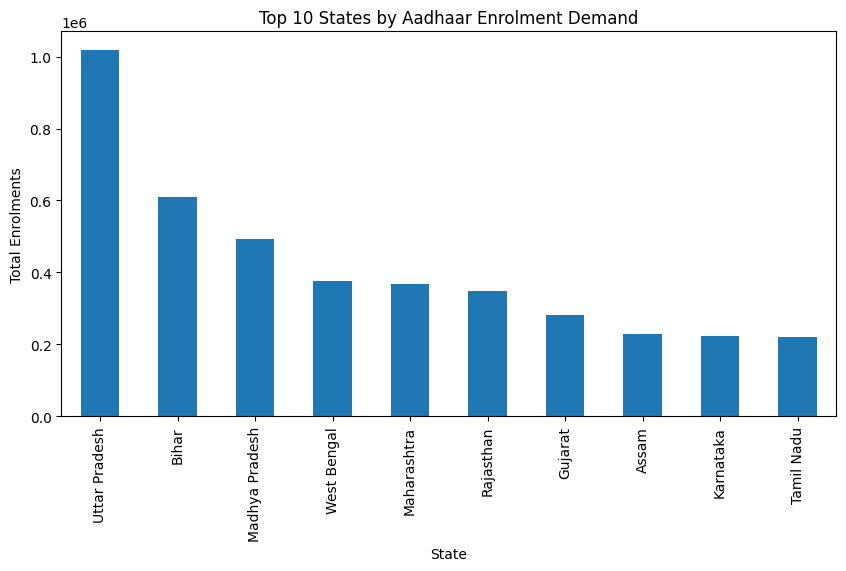

In [ ]:
plt.figure(figsize=(10,5))
state_demand.head(10).plot(kind='bar')
plt.title("Top 10 States by Aadhaar Enrolment Demand")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.show()


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 8 columns):
 #   Column            Non-Null Count    Dtype         
---  ------            --------------    -----         
 0   date              323791 non-null   datetime64[ns]
 1   state             1006029 non-null  object        
 2   district          1006029 non-null  object        
 3   pincode           1006029 non-null  int64         
 4   age_0_5           1006029 non-null  int64         
 5   age_5_17          1006029 non-null  int64         
 6   age_18_greater    1006029 non-null  int64         
 7   total_enrolments  1006029 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 61.4+ MB


In [ ]:
df.isnull().sum()


,0
date,682238
state,0
district,0
pincode,0
age_0_5,0
age_5_17,0
age_18_greater,0
total_enrolments,0


In [ ]:
numeric_cols = ['age_0_5', 'age_5_17', 'age_18_greater']

df[numeric_cols] = df[numeric_cols].fillna(0)


In [ ]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')


In [ ]:
df['total_enrollment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)


In [ ]:
df[['state', 'district', 'total_enrollment']].head()


,state,district,total_enrollment
0,Meghalaya,East Khasi Hills,109
1,Karnataka,Bengaluru Urban,86
2,Uttar Pradesh,Kanpur Nagar,123
3,Uttar Pradesh,Aligarh,106
4,Karnataka,Bengaluru Urban,51


In [ ]:
state_enrollment = df.groupby('state')['total_enrollment'].sum().sort_values(ascending=False)
state_enrollment.head(10)


,total_enrollment
state,
Uttar Pradesh,1018629
Bihar,609585
Madhya Pradesh,493970
West Bengal,375297
Maharashtra,369139
Rajasthan,348458
Gujarat,280549
Assam,230197
Karnataka,223235


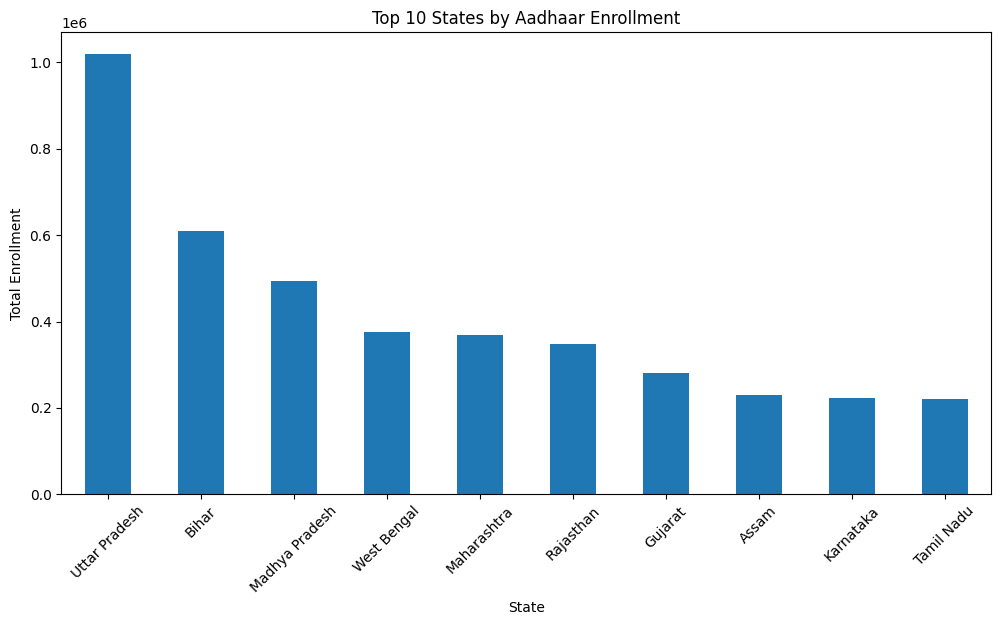

In [ ]:
plt.figure(figsize=(12,6))
state_enrollment.head(10).plot(kind='bar')
plt.title("Top 10 States by Aadhaar Enrollment")
plt.xlabel("State")
plt.ylabel("Total Enrollment")
plt.xticks(rotation=45)
plt.show()


In [ ]:
age_distribution = df[numeric_cols].sum()
age_distribution


,0
age_0_5,3546965
age_5_17,1720384
age_18_greater,168353


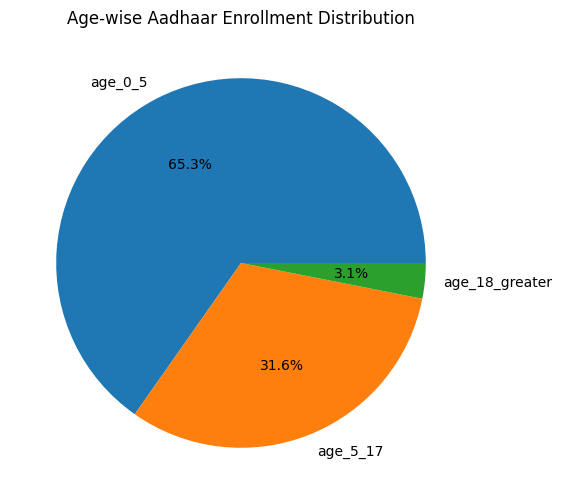

In [ ]:
plt.figure(figsize=(6,6))
age_distribution.plot(kind='pie', autopct='%1.1f%%')
plt.title("Age-wise Aadhaar Enrollment Distribution")
plt.ylabel("")
plt.show()


In [ ]:
district_enrollment = (
    df.groupby(['state', 'district'])['total_enrollment']
    .sum()
    .reset_index()
    .sort_values(by='total_enrollment', ascending=False)
)

district_enrollment.head(10)


,state,district,total_enrollment
572,Maharashtra,Thane,43688
160,Bihar,Sitamarhi,42232
910,Uttar Pradesh,Bahraich,39338
1044,West Bengal,Murshidabad,35911
1057,West Bengal,South 24 Parganas,33540
563,Maharashtra,Pune,31763
771,Rajasthan,Jaipur,31146
397,Karnataka,Bengaluru,30980
983,Uttar Pradesh,Sitapur,30854
164,Bihar,West Champaran,30438


In [ ]:
df.to_csv("/content/drive/MyDrive/Aadhaar_Project_Data/cleaned_aadhaar_data.csv", index=False)


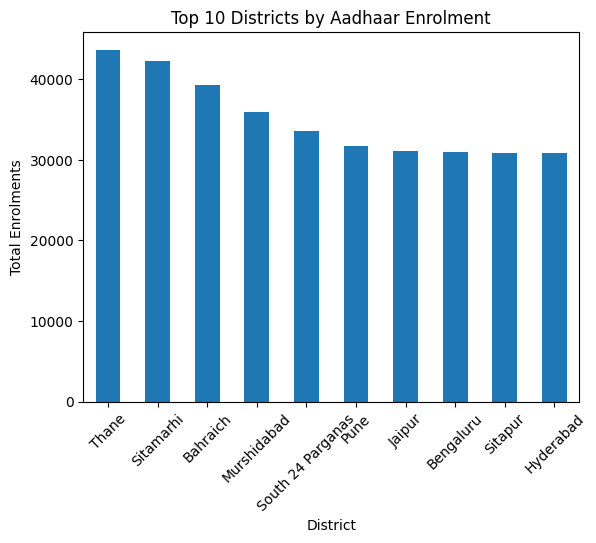

In [ ]:
df['total_enrolment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

df[['age_0_5', 'age_5_17', 'age_18_greater', 'total_enrolment']].head()

import matplotlib.pyplot as plt

top_districts = (
    df.groupby('district')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .head(10)
)

plt.figure()
top_districts.plot(kind='bar')
plt.title("Top 10 Districts by Aadhaar Enrolment")
plt.xlabel("District")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.show()


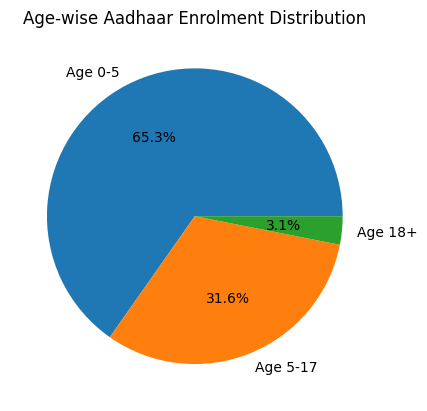

In [ ]:
age_totals = [
    df['age_0_5'].sum(),
    df['age_5_17'].sum(),
    df['age_18_greater'].sum()
]

plt.figure()
plt.pie(
    age_totals,
    labels=['Age 0-5', 'Age 5-17', 'Age 18+'],
    autopct='%1.1f%%'
)
plt.title("Age-wise Aadhaar Enrolment Distribution")
plt.show()


In [ ]:
district_stats = df.groupby('district')['total_enrolment'].sum()

mean = district_stats.mean()
std = district_stats.std()

anomalies = district_stats[
    (district_stats > mean + 2*std) |
    (district_stats < mean - 2*std)
]

anomalies.head(10)


,total_enrolment
district,
Agra,29910
Ahmedabad,19130
Aligarh,26192
Alwar,23383
Aurangabad,27563
Azamgarh,20573
Bahraich,39338
Bareilly,27811
Barwani,21823


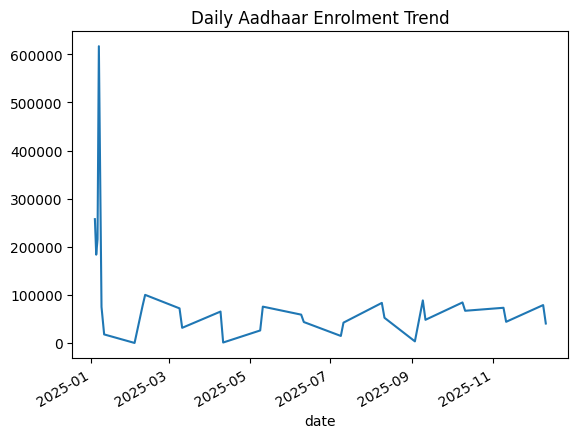

In [ ]:
date_enrolment = (
    df.groupby('date')['total_enrolment']
    .sum()
    .sort_index()
)

date_enrolment.plot(title="Daily Aadhaar Enrolment Trend")
plt.show()


In [ ]:
print("📊 KEY PERFORMANCE INDICATORS")

print("Average Enrolment per District:",
      int(df.groupby('district')['total_enrolment'].sum().mean()))

print("Maximum District Enrolment:",
      df.groupby('district')['total_enrolment'].sum().max())

print("Minimum District Enrolment:",
      df.groupby('district')['total_enrolment'].sum().min())


📊 KEY PERFORMANCE INDICATORS
Average Enrolment per District: 5518
Maximum District Enrolment: 43688
Minimum District Enrolment: 1


In [ ]:
district_total = df.groupby('district')['total_enrolment'].sum()

threshold = district_total.mean() + 2 * district_total.std()

anomaly_districts = district_total[district_total > threshold]

anomaly_districts


,total_enrolment
district,
Agra,29910
Ahmedabad,19130
Aligarh,26192
Alwar,23383
Aurangabad,27563
Azamgarh,20573
Bahraich,39338
Bareilly,27811
Barwani,21823


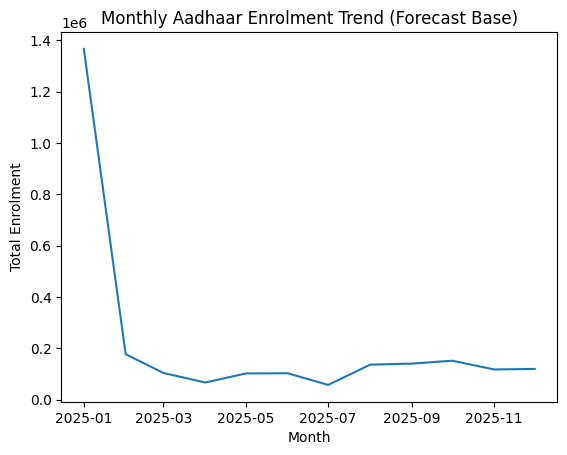

In [ ]:
df['date'] = pd.to_datetime(df['date'])

monthly = (
    df.groupby(df['date'].dt.to_period("M"))['total_enrolment']
    .sum()
    .reset_index()
)

monthly['date'] = monthly['date'].dt.to_timestamp()

plt.figure()
plt.plot(monthly['date'], monthly['total_enrolment'])
plt.title("Monthly Aadhaar Enrolment Trend (Forecast Base)")
plt.xlabel("Month")
plt.ylabel("Total Enrolment")
plt.show()


### Policy Insights & Recommendations

1. High-enrolment districts require additional enrolment centers.
2. Seasonal trends indicate demand spikes requiring temporary staffing.
3. Age group 18+ dominates enrolment – prioritize adult services.
4. Anomaly districts should be audited for operational overload.
5. Forecasting enables proactive infrastructure planning.


In [ ]:
# State-wise summary
state_summary = (
    df.groupby('state')['total_enrolment']
    .sum()
    .sort_values(ascending=False)
    .reset_index()
)

state_summary.to_csv(
    "/content/drive/MyDrive/Aadhaar_Project_Data/state_summary.csv",
    index=False
)

# District anomalies
anomaly_districts.reset_index().to_csv(
    "/content/drive/MyDrive/Aadhaar_Project_Data/anomaly_districts.csv",
    index=False
)

print("✅ Analytics outputs saved successfully")


✅ Analytics outputs saved successfully


In [ ]:
# 📌 CELL 32 — DISTRICT PRESSURE SCORE

df['total_enrolment'] = (
    df['age_0_5'] +
    df['age_5_17'] +
    df['age_18_greater']
)

district_load = (
    df.groupby(['state', 'district'])['total_enrolment']
    .sum()
    .reset_index()
)

state_avg = (
    district_load.groupby('state')['total_enrolment']
    .mean()
    .reset_index()
    .rename(columns={'total_enrolment': 'state_avg_enrolment'})
)

district_load = district_load.merge(state_avg, on='state')

district_load['pressure_score'] = (
    district_load['total_enrolment'] /
    district_load['state_avg_enrolment']
)

district_load.head()


,state,district,total_enrolment,state_avg_enrolment,pressure_score
0,100000,100000,218,218.000000,1.000000
1,Andaman & Nicobar Islands,Andamans,75,38.000000,1.973684
2,Andaman & Nicobar Islands,Nicobars,1,38.000000,0.026316
3,Andaman & Nicobar Islands,South Andaman,38,38.000000,1.000000
4,Andaman and Nicobar Islands,Nicobar,75,132.333333,0.566751


In [ ]:
# 📌 CELL 33 — POLICY RECOMMENDATION LOGIC

def recommend_action(score):
    if score >= 1.5:
        return "Urgent: Open New Aadhaar Enrolment Center"
    elif score >= 1.2:
        return "Increase Staffing & Resources"
    else:
        return "Current Infrastructure Sufficient"

district_load['policy_recommendation'] = district_load['pressure_score'].apply(recommend_action)

district_load.head(10)


,state,district,total_enrolment,state_avg_enrolment,pressure_score,policy_recommendation
0,100000,100000,218,218.000000,1.000000,Current Infrastructure Sufficient
1,Andaman & Nicobar Islands,Andamans,75,38.000000,1.973684,Urgent: Open New Aadhaar Enrolment Center
2,Andaman & Nicobar Islands,Nicobars,1,38.000000,0.026316,Current Infrastructure Sufficient
3,Andaman & Nicobar Islands,South Andaman,38,38.000000,1.000000,Current Infrastructure Sufficient
4,Andaman and Nicobar Islands,Nicobar,75,132.333333,0.566751,Current Infrastructure Sufficient
5,Andaman and Nicobar Islands,North And Middle Andaman,132,132.333333,0.997481,Current Infrastructure Sufficient
6,Andaman and Nicobar Islands,South Andaman,190,132.333333,1.435768,Increase Staffing & Resources
7,Andhra Pradesh,Adilabad,1419,2716.617021,0.522341,Current Infrastructure Sufficient
8,Andhra Pradesh,Alluri Sitharama Raju,1255,2716.617021,0.461972,Current Infrastructure Sufficient
9,Andhra Pradesh,Anakapalli,543,2716.617021,0.199881,Current Infrastructure Sufficient


In [ ]:
# 📌 CELL 34 — TOP 10 HIGH PRESSURE DISTRICTS

district_load.sort_values(
    by='pressure_score',
    ascending=False
).head(10)


,state,district,total_enrolment,state_avg_enrolment,pressure_score,policy_recommendation
850,Telangana,Hyderabad,25990,3132.714286,8.296320,Urgent: Open New Aadhaar Enrolment Center
397,Karnataka,Bengaluru,30980,3986.339286,7.771541,Urgent: Open New Aadhaar Enrolment Center
732,Punjab,Ludhiana,17614,2740.928571,6.426289,Urgent: Open New Aadhaar Enrolment Center
572,Maharashtra,Thane,43688,6964.886792,6.272607,Urgent: Open New Aadhaar Enrolment Center
699,Orissa,Khordha,726,118.542857,6.124367,Urgent: Open New Aadhaar Enrolment Center
318,Jammu & Kashmir,Jammu,62,10.333333,6.000000,Urgent: Open New Aadhaar Enrolment Center
400,Karnataka,Bengaluru Urban,23074,3986.339286,5.788268,Urgent: Open New Aadhaar Enrolment Center
856,Telangana,K.v. Rangareddy,17409,3132.714286,5.557162,Urgent: Open New Aadhaar Enrolment Center
1044,West Bengal,Murshidabad,35911,6470.637931,5.549839,Urgent: Open New Aadhaar Enrolment Center
1057,West Bengal,South 24 Parganas,33540,6470.637931,5.183415,Urgent: Open New Aadhaar Enrolment Center
